Welcome to initial exploration of the dataset. I am going to present basic information and sentiment analysis with vader.

In [463]:
import os
import pandas as pd

base_input_path = 'data/tweets_data_final'
subfolders = ['Konfa', 'NL', 'PIS', 'PO', 'PL2050', 'PSL']
output_folder = 'data/tweets_data_combined'

os.makedirs(output_folder, exist_ok=True)

#processing subsfolders
for subfolder in subfolders:
    folder_path = os.path.join(base_input_path, subfolder)
    dataframes = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            politician = filename.split("_tweets.json")[0]
            try:
                df = pd.read_json(file_path)  # Use lines=True for line-delimited JSON
                df["username"] = politician  # Add a column for the politician's username
                df["party"] = subfolder
                print(f"Read {len(df)} rows from {file_path}")  # Print the number of rows read
                dataframes.append(df)
            except ValueError as e:
                print(f"Error reading {file_path}: {e}")
    
    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        
        # Save combined DataFrame to a file
        output_file_path = os.path.join(output_folder, f'{subfolder}_combined.pkl')
        combined_df.to_pickle(output_file_path)  # You can also use .to_csv() for CSV format
        
        print(f"Saved {subfolder} combined data to {output_file_path}")

print("Processing complete!")

Read 950 rows from data/tweets_data_final/Konfa/Wlodek_Skalik_2023-10-16_2024-10-15.json
Read 721 rows from data/tweets_data_final/Konfa/SlawomirMentzen_2023-10-16_2024-10-15.json
Read 175 rows from data/tweets_data_final/Konfa/TudujKrzysztof_2023-10-16_2024-10-15.json
Read 964 rows from data/tweets_data_final/Konfa/bartlomiejpejo_2023-10-16_2024-10-15.json
Read 750 rows from data/tweets_data_final/Konfa/WTumanowicz_2023-10-16_2024-10-15.json
Saved Konfa combined data to data/tweets_data_combined/Konfa_combined.pkl
Read 457 rows from data/tweets_data_final/NL/RobertBiedron_2023-10-16_2024-10-15.json
Read 178 rows from data/tweets_data_final/NL/KGawkowski_2023-10-16_2024-10-15.json
Read 73 rows from data/tweets_data_final/NL/wlodekczarzasty_2023-10-16_2024-10-15.json
Read 0 rows from data/tweets_data_final/NL/DyduchMarek_2023-10-16_2024-10-15.json
Saved NL combined data to data/tweets_data_combined/NL_combined.pkl
Read 647 rows from data/tweets_data_final/PIS/MorawieckiM_2023-10-16_2024

In [464]:
df_konfa = pd.read_pickle(os.path.join(output_folder, 'Konfa_combined.pkl'))
df_NL = pd.read_pickle(os.path.join(output_folder, 'NL_combined.pkl'))
df_PIS = pd.read_pickle(os.path.join(output_folder, 'PIS_combined.pkl'))
df_PO = pd.read_pickle(os.path.join(output_folder, 'PO_combined.pkl'))
df_PL2050 = pd.read_pickle(os.path.join(output_folder, 'PL2050_combined.pkl'))
df_PSL = pd.read_pickle(os.path.join(output_folder, 'PSL_combined.pkl'))

In [465]:
df_konfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      3560 non-null   int64              
 1   possibly_sensitive      3560 non-null   bool               
 2   in_reply_to_user_id     726 non-null    float64            
 3   created_at              3560 non-null   datetime64[ns, UTC]
 4   referenced_tweets       1055 non-null   object             
 5   edit_controls           3560 non-null   object             
 6   entities                3281 non-null   object             
 7   text                    3560 non-null   object             
 8   public_metrics          3560 non-null   object             
 9   edit_history_tweet_ids  3560 non-null   object             
 10  reply_settings          3560 non-null   object             
 11  author_id               3560 non-null   int

In [466]:
df_konfa['id'].nunique()

3555

In [467]:
# Merge all dataframes into one
df = pd.concat([df_konfa, df_NL, df_PIS, df_PO, df_PL2050, df_PSL], ignore_index=True)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11517 entries, 0 to 11516
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      11517 non-null  float64            
 1   possibly_sensitive      11517 non-null  object             
 2   in_reply_to_user_id     1888 non-null   float64            
 3   created_at              11517 non-null  datetime64[ns, UTC]
 4   referenced_tweets       3219 non-null   object             
 5   edit_controls           11517 non-null  object             
 6   entities                9871 non-null   object             
 7   text                    11517 non-null  object             
 8   public_metrics          11517 non-null  object             
 9   edit_history_tweet_ids  11517 non-null  object             
 10  reply_settings          11517 non-null  object             
 11  author_id               11517 non-null  f

In [469]:
df['id'].nunique()

11468

In [470]:
# Remove duplicates from the dataframe based on specific columns
df.drop_duplicates(subset=['id'], inplace=True)


In [471]:
# df_konfa.drop_duplicates(subset=['id'], inplace=True)
# df_NL.drop_duplicates(subset=['id'], inplace=True)
# df_PIS.drop_duplicates(subset=['id'], inplace=True)
# df_PO.drop_duplicates(subset=['id'], inplace=True)
# df_PL2050.drop_duplicates(subset=['id'], inplace=True)
# df_PSL.drop_duplicates(subset=['id'], inplace=True)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11468 entries, 0 to 11515
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      11468 non-null  float64            
 1   possibly_sensitive      11468 non-null  object             
 2   in_reply_to_user_id     1878 non-null   float64            
 3   created_at              11468 non-null  datetime64[ns, UTC]
 4   referenced_tweets       3203 non-null   object             
 5   edit_controls           11468 non-null  object             
 6   entities                9829 non-null   object             
 7   text                    11468 non-null  object             
 8   public_metrics          11468 non-null  object             
 9   edit_history_tweet_ids  11468 non-null  object             
 10  reply_settings          11468 non-null  object             
 11  author_id               11468 non-null  float6

In [473]:
df.head()

,id,possibly_sensitive,in_reply_to_user_id,created_at,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,author_id,lang,conversation_id,category,context_annotations,attachments,geo,username,party
0,1.846268e+18,False,509272614.0,2024-10-15 19:11:46+00:00,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,1.187749e+18,pl,1.846156e+18,Reply,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
1,1.846265e+18,False,NaN,2024-10-15 18:59:59+00:00,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,1.187749e+18,pl,1.846265e+18,Original,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
2,1.846263e+18,False,955239446.0,2024-10-15 18:51:42+00:00,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,1.187749e+18,pl,1.846128e+18,Reply,NaN,NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
3,1.846261e+18,False,NaN,2024-10-15 18:46:20+00:00,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 h...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,1.187749e+18,pl,1.846261e+18,Quote,"[{'domain': {'id': '10', 'name': 'Person', 'de...",NaN,NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa
4,1.846105e+18,False,NaN,2024-10-15 08:24:33+00:00,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌Kilka dni temu zagłosowałem za odwołaniem Krz...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,1.187749e+18,pl,1.846105e+18,Original,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",{'media_keys': ['3_1846104848942432256']},NaN,Wlodek_Skalik_2023-10-16_2024-10-15.json,Konfa


In [474]:
# Update the 'username' column to keep only the string until '_2'
df['username'] = df['username'].str.split('_2').str[0]

In [475]:
category_summary = df['category'].value_counts()
print(category_summary)
total_tweets = category_summary.sum()
print(f"Total tweets: {total_tweets}")

category
Original    8235
Reply       1851
Quote       1370
Retweet       12
Name: count, dtype: int64
Total tweets: 11468


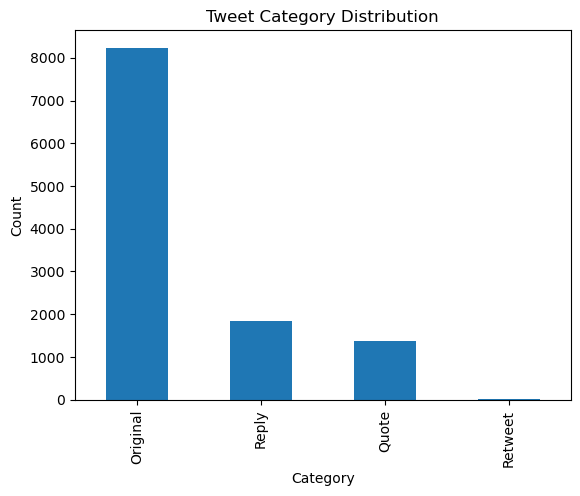

In [476]:
import matplotlib.pyplot as plt

# Plot the category summary as a bar plot
category_summary.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Tweet Category Distribution')
plt.show()

Top 10 active users

In [477]:
top_ten_users = df['username'].value_counts().head(10)
print(top_ten_users)

username
PatrykJaki         1023
bartlomiejpejo      963
Wlodek_Skalik       949
mwojcik_            781
WTumanowicz         749
SlawomirMentzen     720
MorawieckiM         646
BeataSzydlo         555
OklaDrewnowicz      455
RobertBiedron       452
Name: count, dtype: int64


Top 10 active users (only original posts)

In [478]:
# Filter the dataframe to include only original posts
original_posts_df = df[df['category'] == 'Original']

# Get the top ten users based on the number of original posts
top_ten_original_users = original_posts_df['username'].value_counts().head(10)
print(top_ten_original_users)

username
bartlomiejpejo     835
mwojcik_           646
PatrykJaki         638
MorawieckiM        563
SlawomirMentzen    556
Wlodek_Skalik      521
BeataSzydlo        510
WTumanowicz        490
KosiniakKamysz     403
RobertBiedron      388
Name: count, dtype: int64


the most active user from each party

In [479]:
most_active_users = df.groupby('party')['username'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'username']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'username'])
print(most_active_users_with_counts)

    party        username  counts
0   Konfa  bartlomiejpejo     963
1      NL   RobertBiedron     452
2     PIS      PatrykJaki    1023
3  PL2050     Kpelczynska     225
4      PO  OklaDrewnowicz     455
5     PSL  KosiniakKamysz     408


In [480]:
most_active_users = original_posts_df.groupby('party')['username'].agg(lambda x: x.value_counts().idxmax())
tweet_counts = df.groupby(['party', 'username']).size().reset_index(name='counts')
most_active_users_with_counts = most_active_users.reset_index().merge(tweet_counts, on=['party', 'username'])
print(most_active_users_with_counts)


    party        username  counts
0   Konfa  bartlomiejpejo     963
1      NL   RobertBiedron     452
2     PIS        mwojcik_     781
3  PL2050     Kpelczynska     225
4      PO      donaldtusk     337
5     PSL  KosiniakKamysz     408


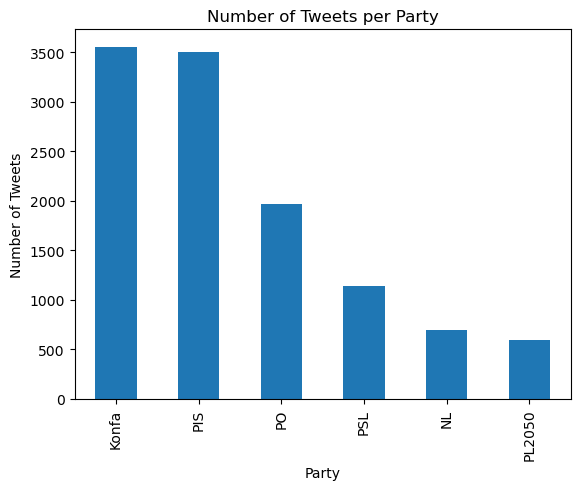

In [481]:
import matplotlib.pyplot as plt

# Group by party and count the number of tweets
tweets_per_party = df['party'].value_counts()

# Plot the data
tweets_per_party.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Party')
plt.show()

In [482]:
# Ensure the created_at column is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Set the created_at column as the index
df.set_index('created_at', inplace=True)

Spike around euroelection

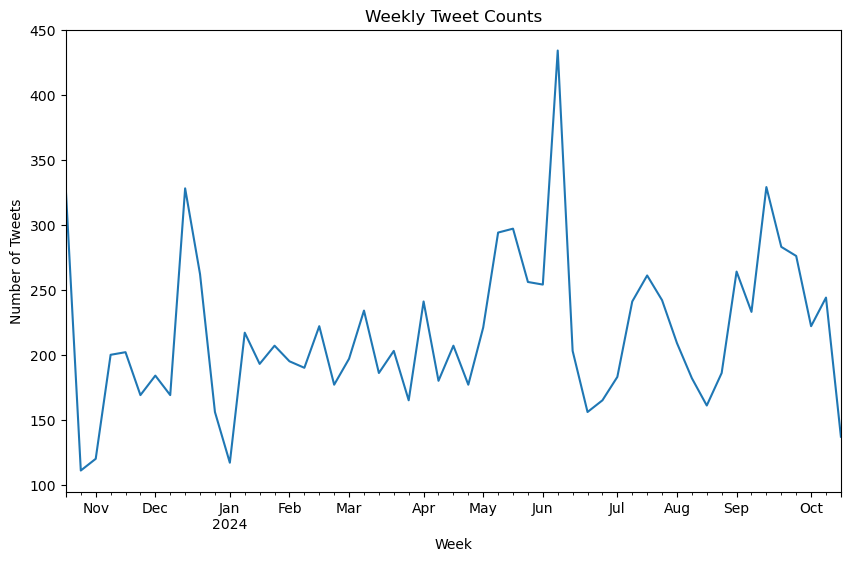

In [483]:


# Resample the data weekly and count the number of tweets per week
weekly_tweets = df.resample('W').size()

# Plot the weekly tweet counts
weekly_tweets.plot(kind='line', figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts')
plt.show()

Interesting to see that after the election PO was most active and PiS not to much.

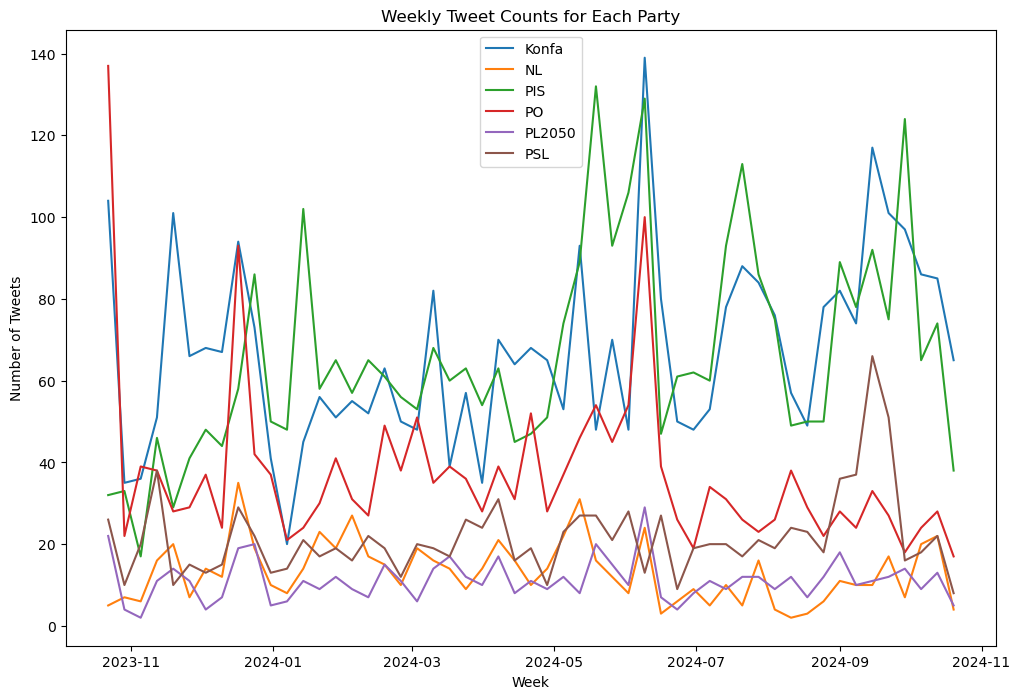

In [484]:
parties = df['party'].unique()

# Plot weekly tweet counts for each party on one plot
plt.figure(figsize=(12, 8))

for party in parties:
    party_df = df[df['party'] == party]
    weekly_tweets = party_df.resample('W').size()
    plt.plot(weekly_tweets, label=party)

plt.xlabel('Week')
plt.ylabel('Number of Tweets')
plt.title('Weekly Tweet Counts for Each Party')
plt.legend()
plt.show()

New column with text encoded as utf-8

In [485]:
# Create a new column 'text_utf' where 'text' is encoded as utf-8
df['text_utf'] = df['text'].apply(lambda x: x.encode('utf-8'))

adding spaces between emojis

In [486]:
import re
import emoji
def add_space_around_emojis(text):
    return ''.join(f' {char} ' if char in emoji.EMOJI_DATA or re.match(r'[\U0001F1E6-\U0001F1FF]', char) else char for char in text)

df['text'] = df['text'].apply(add_space_around_emojis)
def clean_text(text):
    # Remove mentions and links
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    # Ensure there is a space before and after each emoji
    text = re.sub(r'(?<!\s)([\U0001F600-\U0001F64F])', r' \1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F])(?!\s)', r'\1 ', text)
    return text

df['text_clean'] = df['text'].apply(clean_text)

After deleting values with links only we got 200 posts less

Number of words per party - WYFILTROWAC @ I LINKI - potencjalnie. 
done
emoji oddzielone o jedną spację zawsze

In [487]:
# Ensure there is a space before and after each emoji in the 'text_utf' column
df['word_count'] = df['text_clean'].apply(lambda x: len(x.split()))

# Group by party and calculate the summary statistics for word count
word_count_summary = df.groupby('party')['word_count'].describe()
print(word_count_summary)

         count       mean        std  min   25%   50%   75%   max
party                                                            
Konfa   3555.0  22.652321  13.885964  0.0  10.0  21.0  36.0  52.0
NL       700.0  21.982857  13.079913  0.0  11.0  21.0  34.0  48.0
PIS     3504.0  23.944635  14.156251  0.0  11.0  25.0  37.0  56.0
PL2050   592.0  26.369932  14.489040  0.0  13.0  30.0  39.0  55.0
PO      1974.0  18.839412  13.484238  0.0   6.0  16.0  31.0  68.0
PSL     1143.0  26.308836  12.628949  0.0  16.0  30.0  37.0  53.0


Median number of words per user user party

In [488]:
# Group by party and username, then calculate the mean word count for each user
user_word_count_summary = df.groupby(['party', 'username'])['word_count'].median().reset_index()

# Group by party and calculate the mean word count for each party
party_user_word_count_summary = user_word_count_summary.groupby('party')['word_count'].median().reset_index()

print(party_user_word_count_summary)

    party  word_count
0   Konfa        21.5
1      NL        20.0
2     PIS        26.0
3  PL2050        26.5
4      PO        18.0
5     PSL        25.5


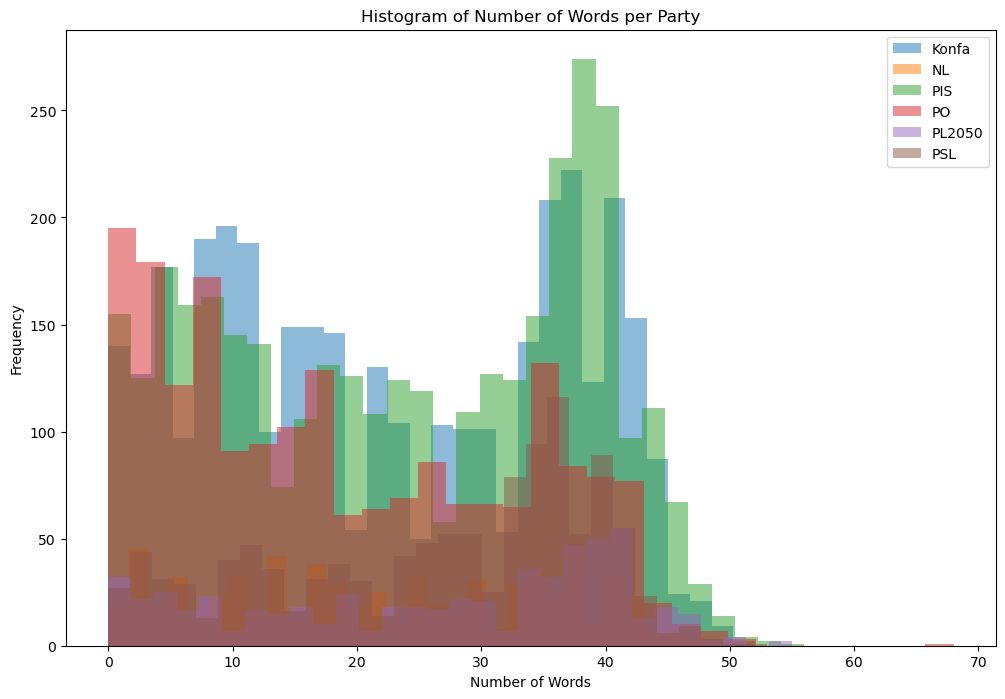

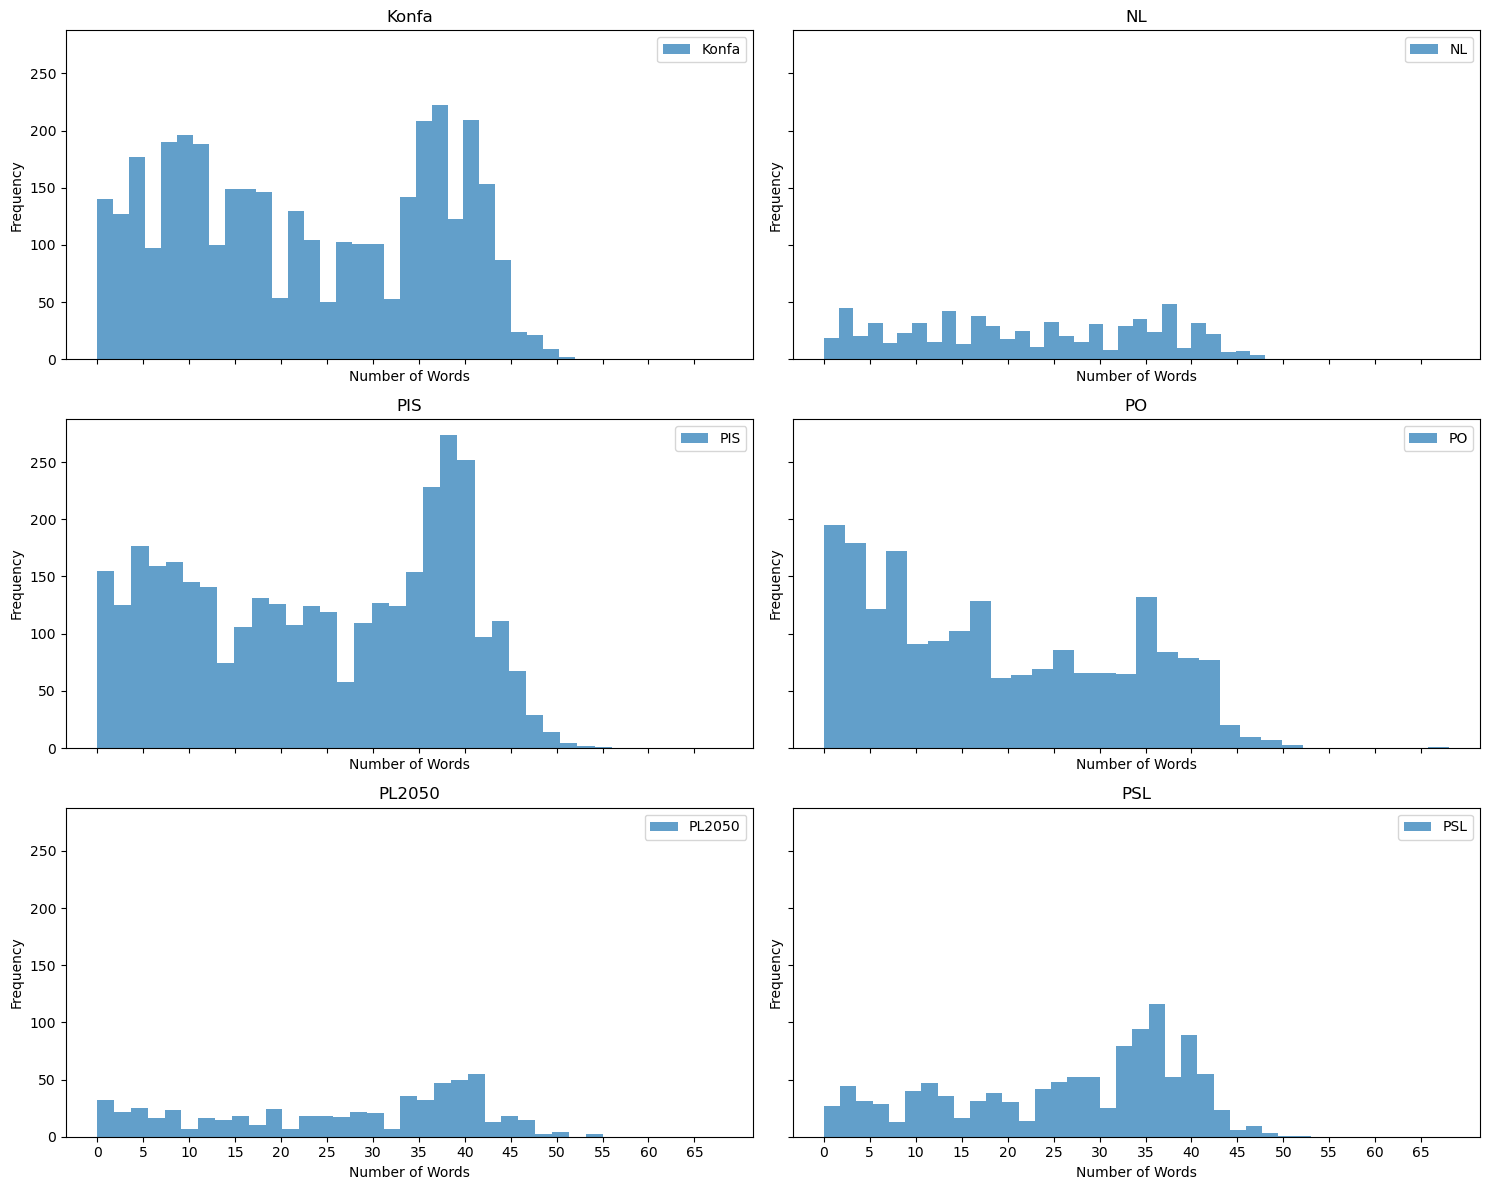

In [489]:
import matplotlib.pyplot as plt

# Create histograms for the number of words per party
parties = df['party'].unique()
plt.figure(figsize=(12, 8))

for party in parties:
    plt.hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.5, label=party)

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words per Party')
plt.legend()
plt.show()
# Create individual histograms for each party
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, party in enumerate(parties):
    axes[i].hist(df[df['party'] == party]['word_count'], bins=30, alpha=0.7, label=party)
    axes[i].set_title(f'{party}')
    axes[i].set_xlabel('Number of Words')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_xticks(range(0, df['word_count'].max() + 1, 5))  # Set x-axis scale

plt.tight_layout()
plt.show()


In [490]:
import emoji

# Create a function to count emojis in a text
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

# Add the 'emoji_count' column to the dataframe
df['emoji_count'] = df['text_clean'].apply(count_emojis)

# Calculate the total number of emojis in the 'text' column per unique value in the 'party' column
emoji_counts_per_party = df.groupby('party')['emoji_count'].sum().reset_index()
emoji_counts_per_party.columns = ['party', 'total_emoji_count']

print(emoji_counts_per_party)
# Calculate the average number of emojis per post for each party
average_emoji_per_post_per_party = df.groupby('party')['emoji_count'].mean().reset_index()
average_emoji_per_post_per_party.columns = ['party', 'average_emoji_per_post']

print(average_emoji_per_post_per_party)

    party  total_emoji_count
0   Konfa               1696
1      NL                727
2     PIS               1390
3  PL2050                121
4      PO               1712
5     PSL                812
    party  average_emoji_per_post
0   Konfa                0.477075
1      NL                1.038571
2     PIS                0.396689
3  PL2050                0.204392
4      PO                0.867275
5     PSL                0.710411


In [491]:
# Extract public metrics into separate columns
df['retweet_count'] = df['public_metrics'].apply(lambda x: x['retweet_count'])
df['reply_count'] = df['public_metrics'].apply(lambda x: x['reply_count'])
df['like_count'] = df['public_metrics'].apply(lambda x: x['like_count'])
df['quote_count'] = df['public_metrics'].apply(lambda x: x['quote_count'])

# Group by party and calculate the sum of each metric
public_metrics_summary = df.groupby('party')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].sum().reset_index()

# Get the total number of posts for each party
total_posts_per_party = df['party'].value_counts().reset_index()
total_posts_per_party.columns = ['party', 'total_posts']

# Merge the public metrics summary with the total posts per party
public_metrics_summary = public_metrics_summary.merge(total_posts_per_party, on='party')

# Normalize the metrics per number of posts
public_metrics_summary['retweet_count_per_post'] = public_metrics_summary['retweet_count'] / public_metrics_summary['total_posts']
public_metrics_summary['reply_count_per_post'] = public_metrics_summary['reply_count'] / public_metrics_summary['total_posts']
public_metrics_summary['like_count_per_post'] = public_metrics_summary['like_count'] / public_metrics_summary['total_posts']
public_metrics_summary['quote_count_per_post'] = public_metrics_summary['quote_count'] / public_metrics_summary['total_posts']

print(public_metrics_summary[['party', 'retweet_count_per_post', 'reply_count_per_post', 'like_count_per_post', 'quote_count_per_post']])

    party  retweet_count_per_post  reply_count_per_post  like_count_per_post  \
0   Konfa               52.355274             64.246132           782.412940   
1      NL               25.692857             89.512857           342.064286   
2     PIS              299.674943            384.872146          1088.127854   
3  PL2050               93.248311            369.371622          1149.081081   
4      PO              343.629686            458.780648          2594.276596   
5     PSL               39.521435            181.994751           392.542432   

   quote_count_per_post  
0              4.548523  
1              6.465714  
2             16.163242  
3             21.464527  
4             39.599797  
5             10.216973  


In [492]:
# Create a new dataframe with 'id' and 'text_clean' columns
df_clean_text = df[['id', 'text_clean']]

# Export the dataframe to a CSV file
df_clean_text.to_csv('clean_text_data.csv', index=False)

ID ZAPISUJE SIE JAKO FLOAT I NIE ODCZYTIJE SIE DOBRZE Z CSV STAD ZMIANA NA STRING

In [510]:
# Read the clean_text_data.csv file into a DataFrame
df_clean_text = pd.read_csv('data/clean_text_en.csv', dtype={'id': str})

# Display the first few rows of the DataFrame
df_clean_text.head()


,id,text_clean,text_clean_en
0,1.84626774302233e+18,"""Ani kroku wstecz!"" - w przód też żadnego jak...","""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,Właśnie zadzwonił do mnie nieznany numer. Już ...,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,"Czy ""jeszcze cięższa praca"" przełoży się na r...","Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,Polecam się zapoznać z treścią konferencji 👇,I recommend reading the content of the confere...
4,1.8461048658290156e+18,❌ Kilka dni temu zagłosowałem za odwołani...,"❌ A few days ago, I voted to dismiss Krzysz..."


In [511]:
# Change the type of 'id' column to float
df['id'] = df['id'].astype('string')

In [512]:
# Ensure the 'text_clean_en' column exists in df_clean_text
if 'text_clean_en' in df_clean_text.columns:
    # Merge the 'text_clean_en' column from df_clean_text to df based on the 'id' column
    df = df.merge(df_clean_text[['id', 'text_clean_en']], on='id', how='left')

    # Display the first few rows of the updated dataframe to verify the merge
    display(df.head())
else:
    print("Column 'text_clean_en' does not exist in df_clean_text")


,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,text_utf,text_clean,word_count,emoji_count,retweet_count,reply_count,like_count,quote_count,text_clean_eng1,text_clean_en
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,"b'@Dariusz_Jonski ""Ani kroku wstecz!"" - w prz\...","""Ani kroku wstecz!"" - w przód też żadnego jak...",12,0,0,1,13,0,,"""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,b'W\xc5\x82a\xc5\x9bnie zadzwoni\xc5\x82 do mn...,Właśnie zadzwonił do mnie nieznany numer. Już ...,23,0,28,9,418,0,,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,"b'@KosiniakKamysz Czy ""jeszcze ci\xc4\x99\xc5\...","Czy ""jeszcze cięższa praca"" przełoży się na r...",14,0,4,1,38,0,,"Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,b'Polecam si\xc4\x99 zapozna\xc4\x87 z tre\xc5...,Polecam się zapoznać z treścią konferencji 👇,7,1,9,2,48,0,,I recommend reading the content of the confere...
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,b'\xe2\x9d\x8cKilka dni temu zag\xc5\x82osowa\...,❌ Kilka dni temu zagłosowałem za odwołaniem K...,36,2,30,0,141,0,,"❌ A few days ago, I voted to dismiss Krzysz..."


In [521]:
# Replace '#VALUE!' with NaN in 'text_clean_en' column
df['text_clean_en'].replace('#VALUE!', pd.NA, inplace=True)

In [523]:
df['text_clean_en_demojized'] = df['text_clean_en'].apply(lambda x: emoji.demojize(str(x)) if pd.notnull(x) else x)

df[['text_clean_en', 'text_clean_en_demojized']].head()

,text_clean_en,text_clean_en_demojized
0,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw..."
1,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...
2,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu..."
3,I recommend reading the content of the confere...,I recommend reading the content of the confere...
4,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis..."


SENTIMENT ANALYSIS

In [524]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mateuszpliszka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mateuszpliszka/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [527]:
# Create a new dataframe where there are no NA values for 'text_clean_en'
df_no_na = df[df['text_clean_en'].notna()]

# Display the first few rows of the new dataframe to verify
df_no_na.head()

,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,text_clean,word_count,emoji_count,retweet_count,reply_count,like_count,quote_count,text_clean_eng1,text_clean_en,text_clean_en_demojized
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,"""Ani kroku wstecz!"" - w przód też żadnego jak...",12,0,0,1,13,0,,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw..."
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,Właśnie zadzwonił do mnie nieznany numer. Już ...,23,0,28,9,418,0,,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,"Czy ""jeszcze cięższa praca"" przełoży się na r...",14,0,4,1,38,0,,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu..."
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,Polecam się zapoznać z treścią konferencji 👇,7,1,9,2,48,0,,I recommend reading the content of the confere...,I recommend reading the content of the confere...
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,❌ Kilka dni temu zagłosowałem za odwołaniem K...,36,2,30,0,141,0,,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis..."


In [533]:
res = {}

for i, row in tqdm(df_no_na.iterrows(), total=len(df_no_na)):
    text = row['text_clean_en_demojized']
    myID = row['id']
    res[myID] = sia.polarity_scores(text)


  0%|          | 0/11276 [00:00<?, ?it/s]

In [536]:
vader_res = pd.DataFrame.from_dict(res, orient='index').reset_index()

vader_res.rename(columns={'index': 'id'}, inplace=True)

vader_res.head()

,id,neg,neu,pos,compound
0,1.84626774302233e+18,0.000,1.000,0.000,0.0000
1,1.8462647773471176e+18,0.000,0.949,0.051,0.0772
2,1.8462626933945882e+18,0.000,0.867,0.133,0.3818
3,1.8462613413274463e+18,0.000,0.737,0.263,0.3612
4,1.8461048658290156e+18,0.161,0.803,0.036,-0.6705


In [537]:
vader_res.iloc[:, 1:5].mean()

neg         0.068158
neu         0.781189
pos         0.150565
compound    0.166277
dtype: float64

In [538]:
# Merge the values from vader_res to df_no_na by 'id'
df_no_na = df_no_na.merge(vader_res, on='id', how='left')

# Display the first few rows of the updated dataframe to verify the merge
df_no_na.head()

,id,possibly_sensitive,in_reply_to_user_id,referenced_tweets,edit_controls,entities,text,public_metrics,edit_history_tweet_ids,reply_settings,...,reply_count,like_count,quote_count,text_clean_eng1,text_clean_en,text_clean_en_demojized,neg,neu,pos,compound
0,1.84626774302233e+18,False,509272614.0,"[{'type': 'replied_to', 'id': '184615588116918...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@Dariusz_Jonski ""Ani kroku wstecz!"" - w przód ...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",[1846267743022330183],everyone,...,1,13,0,,"""Not a step back!"" - you haven't put any forw...","""Not a step back!"" - you haven't put any forw...",0.000,1.000,0.000,0.0000
1,1.8462647773471176e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...",NaN,Właśnie zadzwonił do mnie nieznany numer. Już ...,"{'retweet_count': 28, 'reply_count': 9, 'like_...",[1846264777347117471],everyone,...,9,418,0,,An unknown number just called me. I thought it...,An unknown number just called me. I thought it...,0.000,0.949,0.051,0.0772
2,1.8462626933945882e+18,False,955239446.0,"[{'type': 'replied_to', 'id': '184612763211236...","{'edits_remaining': 5, 'is_edit_eligible': Fal...","{'mentions': [{'start': 0, 'end': 15, 'usernam...","@KosiniakKamysz Czy ""jeszcze cięższa praca"" pr...","{'retweet_count': 4, 'reply_count': 1, 'like_c...",[1846262693394588154],everyone,...,1,38,0,,"Will ""even harder work"" translate into the fu...","Will ""even harder work"" translate into the fu...",0.000,0.867,0.133,0.3818
3,1.8462613413274463e+18,False,NaN,"[{'type': 'quoted', 'id': '1846159669573689602'}]","{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 45, 'end': 68, 'url': 'htt...",Polecam się zapoznać z treścią konferencji 👇 ...,"{'retweet_count': 9, 'reply_count': 2, 'like_c...",[1846261341327446163],everyone,...,2,48,0,,I recommend reading the content of the confere...,I recommend reading the content of the confere...,0.000,0.737,0.263,0.3612
4,1.8461048658290156e+18,False,NaN,NaN,"{'edits_remaining': 5, 'is_edit_eligible': Tru...","{'urls': [{'start': 277, 'end': 300, 'url': 'h...",❌ Kilka dni temu zagłosowałem za odwołaniem K...,"{'retweet_count': 30, 'reply_count': 0, 'like_...",[1846104865829015639],everyone,...,0,141,0,,"❌ A few days ago, I voted to dismiss Krzysz...",":cross_mark: A few days ago, I voted to dis...",0.161,0.803,0.036,-0.6705


In [539]:
# Group by party and calculate the mean of sentiment scores
sentiment_summary = df_no_na.groupby('party')[['neg', 'neu', 'pos', 'compound']].mean().reset_index()

# Display the sentiment summary
print(sentiment_summary)

    party       neg       neu       pos  compound
0   Konfa  0.073070  0.790602  0.136330  0.112379
1      NL  0.052763  0.796019  0.151207  0.226721
2     PIS  0.091994  0.794124  0.113882  0.023458
3  PL2050  0.048293  0.745998  0.205707  0.345603
4      PO  0.044824  0.754639  0.200038  0.296007
5     PSL  0.042420  0.769036  0.188535  0.401021


In [551]:
# Print the 10 posts with the highest negative sentiment values
top_negative_posts = df_no_na[df_no_na['word_count'] >= 3].nlargest(10, 'neg')[['id', 'text_clean_en', 'neg']]
print(top_negative_posts)

                          id  \
8918   1.798377262099923e+18   
8854  1.8104054846686006e+18   
3027  1.8028075109124465e+18   
6720  1.8074193914090127e+18   
5623  1.8284685389080456e+18   
7456  1.7987221916909568e+18   
600   1.7573868979056643e+18   
823   1.7187360763558344e+18   
3479  1.7186299120372372e+18   
9033  1.7598396933932365e+18   

                                          text_clean_en    neg  
8918                         Shamelessness and villainy  0.857  
8854   Search No. 2, The world of hatred, lies and v...  0.681  
3027                   The Internet takes no prisoners!  0.659  
6720               \n\nNasty government with no future.  0.659  
5623                                      Hate speech 👇  0.649  
7456                             A POLISH SOLDIER DIED.  0.643  
600       \n\nThere is no shortage of ignorant peopl...  0.640  
823                Unfortunately, it doesn't look good.  0.616  
3479            Stop mass and uncontrolled immigration!  0.600

Deleting rows with less than 3 words. Around 700 posts less.